# Pixelwise Visible Ground Plane and Complete Ground Plane

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import path 
from matplotlib import pyplot as plt
import json
from PIL import Image, ImageStat
from sklearn.linear_model import LinearRegression
from scipy import stats
import math

## Load Behavioral Data

In [2]:
# TAC_raw_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

TAC_raw_individual_trial_data_path  = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/TAC_npy_files/matchedVE/normalized/'

# stim 
with open(dpath + 'n_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

# with open(TAC_raw_individual_trial_data_path + 'final_stim_500.npy' , 'rb') as f:
#     stim_500 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'final_stim_750.npy' , 'rb') as f:
#     stim_750 = np.load(f, allow_pickle=True)

with open(dpath + 'n_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)

# x data
with open(dpath + 'n_X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)

# with open(TAC_raw_individual_trial_data_path + 'X_500.npy' , 'rb') as f:
#     X_500 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'X_750.npy' , 'rb') as f:
#     X_750 = np.load(f, allow_pickle=True)

with open(dpath + 'n_X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(dpath + 'n_final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'final_y_500.npy' , 'rb') as f:
#     y_500 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'final_y_750.npy' , 'rb') as f:
#     y_750 = np.load(f, allow_pickle=True)
    
with open(dpath + 'n_final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)

In [3]:
# TAC_raw_individual_trial_residuals_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

TAC_raw_individual_trial_residuals_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

# residuals
with open(TAC_raw_individual_trial_residuals_path + 'residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_500.npy' , 'rb') as f:
    residuals_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_residuals_path + 'residuals_750.npy' , 'rb') as f:
    residuals_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_1000.npy' , 'rb') as f:
    residuals_1000 = np.load(f, allow_pickle=True)

In [4]:
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]


## Load Ground Plane Metrics

In [5]:
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/gp_metrics.json'
gp_metrics = json.load(open(path))
# [percent_VGP_GP, percent_VGP_image, percent_GP_image]

In [6]:
ordered_gp_metrics = []
c_none = 0
for folder in stimfolder_250:
    try:
        ordered_gp_metrics.append(gp_metrics[folder])
    except:
        c_none += 1
        ordered_gp_metrics.append(None)

In [7]:
len(ordered_gp_metrics), c_none

(192, 108)

In [8]:
actual_depth_values = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
    p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" +targetobj_num
    # JSON file
    f = open (p + '/data.json', "r")
    # Reading from file
    data = json.loads(f.read())
    depthval = data['objects'][0]['crossing_point'][0]['depth']
    actual_depth_values.append(depthval)
len(actual_depth_values)

192

In [9]:
trunc_resid_250 = []
trunc_resid_1000 = []
trunc_vgp_gp = []
trunc_vgp = []
trunc_gp = []
trunc_actual = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_vgp_gp.append(metrics[0])
        trunc_vgp.append(metrics[1])
        trunc_gp.append(metrics[2])
        
        trunc_resid_250.append(residuals_250[i])
        trunc_resid_1000.append(residuals_1000[i])
        
        trunc_actual.append(actual_depth_values[i])
         


In [10]:
len(trunc_vgp_gp), len(trunc_resid_250)

(84, 84)

(array([ 4.,  8.,  6., 13., 16., 12., 13.,  5.,  2.,  5.]),
 array([0.02937735, 0.12673327, 0.22408919, 0.32144512, 0.41880104,
        0.51615696, 0.61351289, 0.71086881, 0.80822473, 0.90558066,
        1.00293658]),
 <a list of 10 Patch objects>)

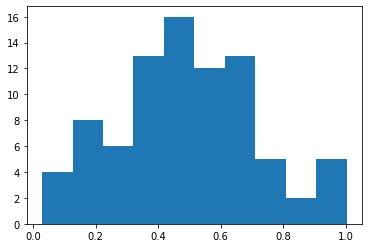

In [11]:
plt.hist(trunc_vgp_gp)

In [12]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP/GP')
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgp_gp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgp_gp))

Correlation between Linear Model Residuals and VGP/GP
250 ms:  (-0.09755775714031313, 0.3773213742221838)
1000 ms:  (-0.07880456652220741, 0.476128696367133)


In [13]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP')
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgp))

Correlation between Linear Model Residuals and VGP
250 ms:  (-0.19877429934445454, 0.06988848525696467)
1000 ms:  (-0.14691342064326518, 0.18234912747607301)


In [14]:
# corr, p-value
print('Correlation between Linear Model Residuals and GP')
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_gp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_gp))

Correlation between Linear Model Residuals and GP
250 ms:  (-0.225763311390918, 0.03893327885405739)
1000 ms:  (-0.16467005949809574, 0.134432090713044)


#### Absolute value of residuals

In [26]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP/GP')
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgp_gp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgp_gp))

Correlation between Abs(Linear Model Residuals) and VGP/GP
250 ms:  (-0.21187442302797377, 0.05301588431756549)
1000 ms:  (-0.1617604008213791, 0.1415496839025556)


In [27]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and GP')
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_gp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_gp))

Correlation between Abs(Linear Model Residuals) and GP
250 ms:  (0.13505362474944863, 0.22062768685414766)
1000 ms:  (0.13847242103046575, 0.20905581791687355)


In [29]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP')
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgp))

Correlation between Abs(Linear Model Residuals) and VGP
250 ms:  (-0.10072571564825128, 0.36195024556549904)
1000 ms:  (-0.06683601649920383, 0.5458039592767134)


m: [-0.2947332]
b: 0.4910569748534285
R-squared:  0.04489077113343676


0.045

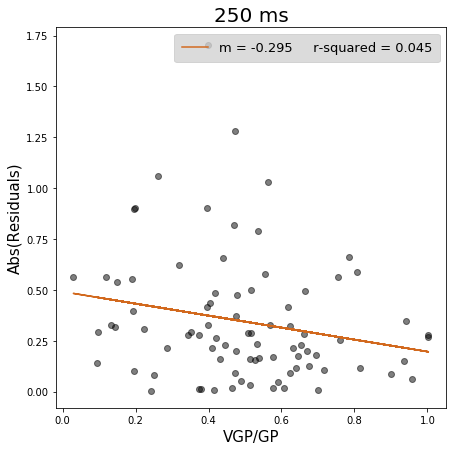

In [31]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_vgp_gp).reshape(-1,1)
y = np.abs(trunc_resid_250)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP/GP", fontsize = 15)
plt.ylabel("Abs(Residuals)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

#### Actual Depth

In [15]:
print('Correlation between Actual Depth and VGP/GP')
print(stats.pearsonr(trunc_actual, trunc_vgp_gp))
print('Correlation between Actual Depth and VGP')
print(stats.pearsonr(trunc_actual, trunc_vgp))
print('Correlation between Actual Depth and GP')
print(stats.pearsonr(trunc_actual, trunc_gp))

Correlation between Actual Depth and VGP/GP
(-0.1307170389689167, 0.2359449614969179)
Correlation between Actual Depth and VGP
(0.056427803766574164, 0.6101728912570376)
Correlation between Actual Depth and GP
(0.320032432639607, 0.003000700309540086)


m: [-0.57535547]
b: 0.28761131285384456
R-squared:  0.02711622849510642


0.027

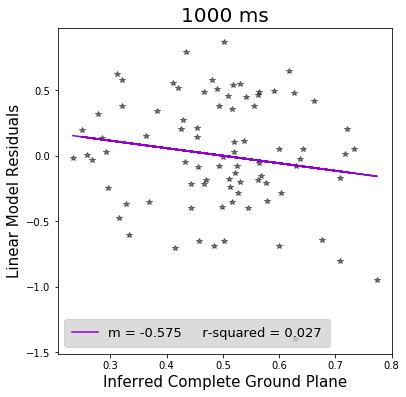

In [16]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_gp).reshape(-1,1)
y = trunc_resid_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, '*', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Inferred Complete Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.76252176]
b: 0.17746548641693774
R-squared:  0.03951122207987878


0.04

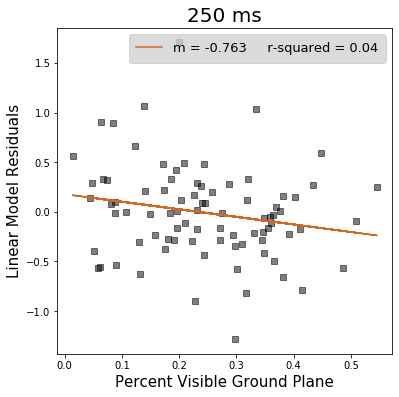

In [17]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgp).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 's', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Percent Visible Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.20328781]
b: 0.09216414035081871
R-squared:  0.009517515978247904


0.01

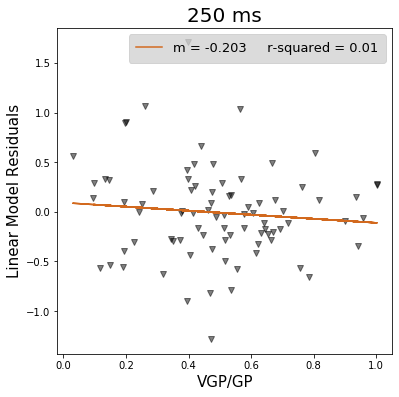

In [18]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgp_gp).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'v', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP/GP", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Global Mean Depth

In [19]:
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

In [20]:
globalMeanDepths = []
for folder in stimfolder_250:
    for file in os.listdir(kinect192_path + '/' + folder + '/depth_bfx'):
        if 'png' in file:
            dm = Image.open(kinect192_path + '/' + folder + '/depth_bfx/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
            globalMeanDepths.append(np.mean(depth_data))

In [21]:
trunc_globalMeanDepths = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_globalMeanDepths.append(globalMeanDepths[i])


In [23]:
print('Correlation between Global Mean Depth and Complete Ground Plane')
print(stats.pearsonr(trunc_globalMeanDepths, trunc_gp))

Correlation between Global Mean Depth and Complete Ground Plane
(0.4774172104112092, 4.392826010524596e-06)


m: [0.12029353]
b: 0.17989858564539263
R-squared:  0.22792719279682105


0.228

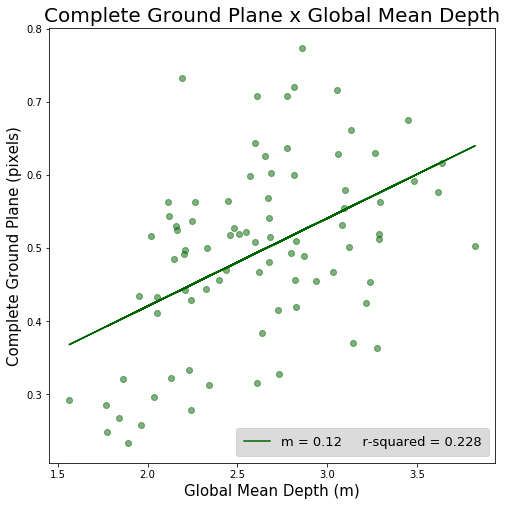

In [25]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(trunc_globalMeanDepths).reshape(-1,1)
y = trunc_gp
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.5);
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Global Mean Depth", fontsize = 20)
plt.xlabel("Global Mean Depth (m)", fontsize = 15)
plt.ylabel("Complete Ground Plane (pixels)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

# Extrinsics

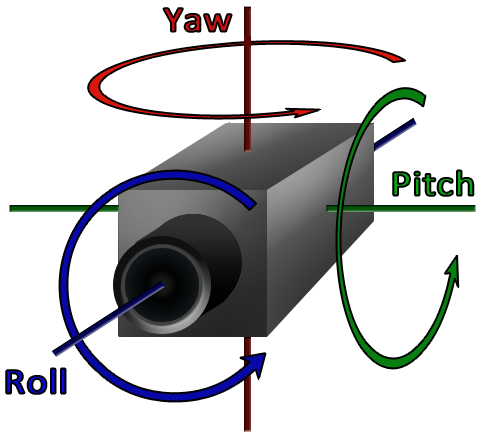

In [32]:
#converts the rotation matrix in extrinsics.txt from string to a numpy array 
def rotationmatrix(matrix_path):
    matrixtext = open(matrix_path).read()
    
    x00 = float(matrixtext.split('\t')[0].split(' ')[0])
    x01 = float(matrixtext.split('\n')[0].split(' ')[1])
    x02 = float(matrixtext.split('\n')[0].split(' ')[2])
    
    x10 = float(matrixtext.split('\n')[1].split(' ')[0])
    x11 = float(matrixtext.split('\n')[1].split(' ')[1])
    x12 = float(matrixtext.split('\n')[1].split(' ')[2])
    
    x20 = float(matrixtext.split('\n')[2].split(' ')[0])
    x21 = float(matrixtext.split('\n')[2].split(' ')[1])
    x22 = float(matrixtext.split('\n')[2].split(' ')[2])
    
    #list of the matrix values excluding the 3rd column of just zeroes 
    matrixlist = [[x00, x01, x02], [x10, x11, x12], [x20, x21, x22]]
    
    #creates 3x3 array of the rotation matrix
    matrixarray = np.full((3,3), matrixlist)
    
    return matrixarray

def rotationMatrixToEulerAngles(path):
    R = rotationmatrix(path)
    #assert(isRotationMatrix(R))
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    singular = sy < 1e-6
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
    return np.array([x, y, z])

# Output - final pitch, roll, yaw values in radians and degrees 
def imageExtrinsics(path):
    in_array = rotationMatrixToEulerAngles(path)
    #print ("Radian values : \n", in_array) 

    degree_Values = np.degrees(in_array) 
    
    return degree_Values[0], degree_Values[1], degree_Values[2]


def extrinsics_distribution(path, kinectv2):
    targetfolder = path.split('/')[1]
    if len(targetfolder) == 59:     
        imagefolder = path.split('/')[1][:-2]
    else:
        imagefolder = path.split('/')[1][:-3]

    extpath = kinectv2 + '/' + imagefolder + '/extrinsics' 
    fname = os.listdir(extpath)[0]
    if fname != '.ipynb_checkpoints':
        extrinsics = imageExtrinsics(extpath + '/' + fname)
    # pitch, roll, yaw
    return extrinsics[0], extrinsics[1], extrinsics[2]

In [36]:
# kinectv2_path = '/Users/prachi/Documents/depth_duration/SUNRGBD/kv2/kinect2data'
kinectv2_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'
# line comprehension for x(stim path) in final_x 

pitches = [extrinsics_distribution(path, kinectv2_path)[0] for path in stim_250]
rolls = [extrinsics_distribution(path, kinectv2_path)[1] for path in stim_250]
yaws = [extrinsics_distribution(path, kinectv2_path)[2] for path in stim_250]



In [41]:
trunc_pitches = []
trunc_rolls = []
trunc_yaws = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_pitches.append(pitches[i])
        trunc_rolls.append(rolls[i])
        trunc_yaws.append(yaws[i])

In [42]:
print('Correlation between Complete Ground Plane and Pitch')
print(stats.pearsonr(trunc_gp, trunc_pitches))

Correlation between Complete Ground Plane and Pitch
(-0.20185956094258725, 0.06556931092047026)


In [43]:
print('Correlation between Complete Ground Plane and Roll')
print(stats.pearsonr(trunc_gp, trunc_rolls))

Correlation between Complete Ground Plane and Roll
(0.028004940573185488, 0.8003661961620707)


In [44]:
print('Correlation between Complete Ground Plane and Yaw')
print(stats.pearsonr(trunc_gp, trunc_yaws))

Correlation between Complete Ground Plane and Yaw
(0.033967185299913834, 0.7590426276787586)


m: [-0.00528045]
b: 0.38203916294571477
R-squared:  0.04074728234393432


0.041

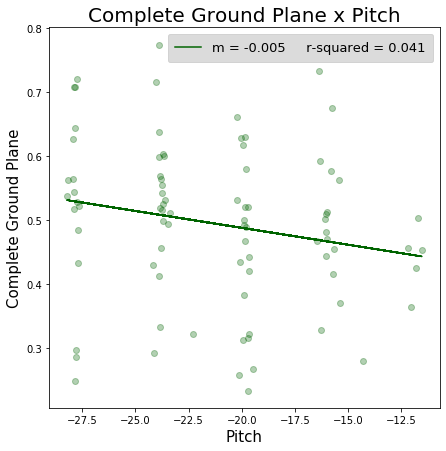

In [48]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_pitches).reshape(-1,1)
y = np.abs(trunc_gp)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.3, marker = 'o');
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Pitch", fontsize = 20)
plt.xlabel("Pitch", fontsize = 15)
plt.ylabel("Complete Ground Plane", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)